In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings("ignore")
import os

In [2]:
train_df = pd.read_csv("Titanic-Dataset.csv")
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# univariate variable analysis

def bar_plot(variable):
    var = train_df[variable]

    varValue = var.value_counts()

    plt.figure(figsize=(9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Freq")
    plt.title(variable)
    plt.show()



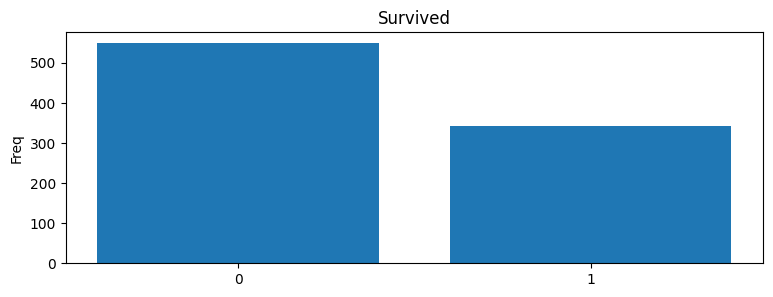

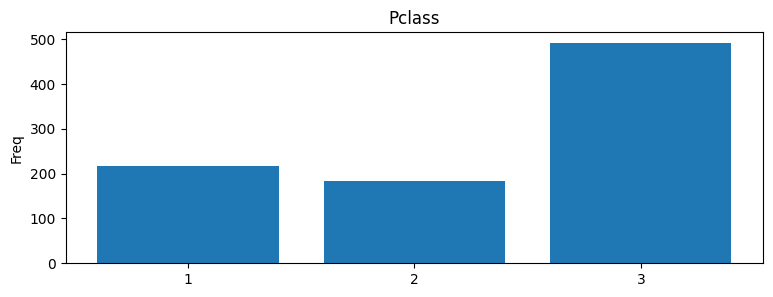

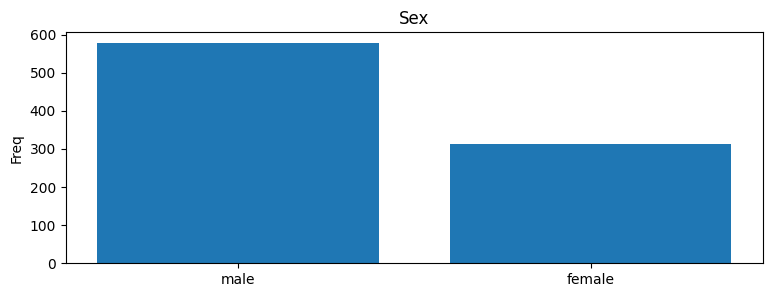

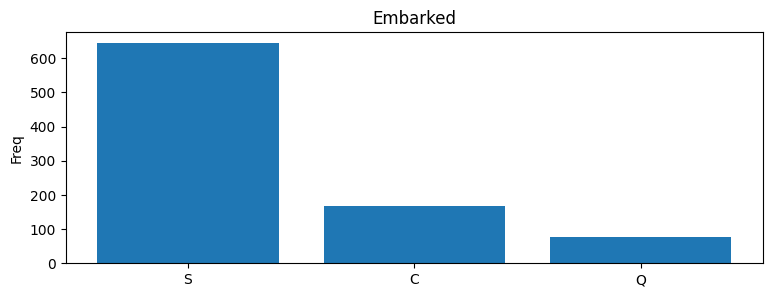

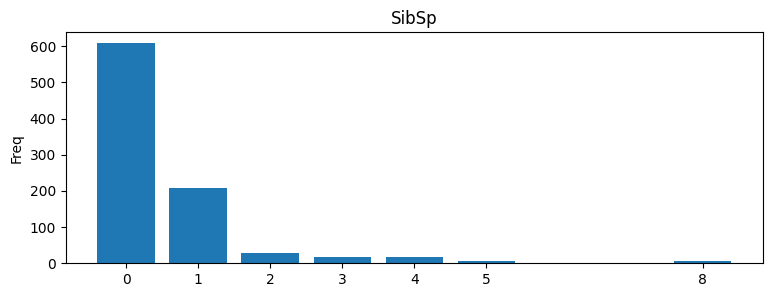

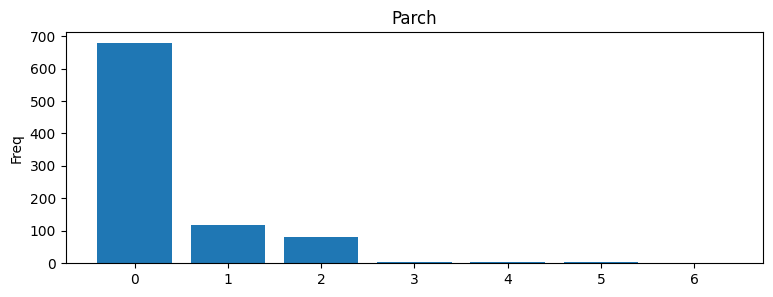

In [7]:
category1 = ["Survived", "Pclass", "Sex", "Embarked", "SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [8]:
category2 = ["Cabin", "Name", "Ticket"]
for c in category2:
    print("{} \n".format(train_df[c].value_counts()))

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64 

Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
Allen, Mr. William Henry                               1
                                                      ..
Montvila, Rev. Juozas                                  1
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  1
Dooley, Mr. Patrick                                    1
Name: count, Length: 891, dtype: int64 

Ticket
347082              7
1601                7
CA. 2343            7
3101295             

In [9]:
def plot_hist(variable):
    plt.figure(figsize=(9,3))
    plt.hist(train_df[variable], bins=50)
    plt.xlabel(variable)
    plt.ylabel("freq")
    plt.title("{} distrubution with hist".format(variable))
    plt.show()


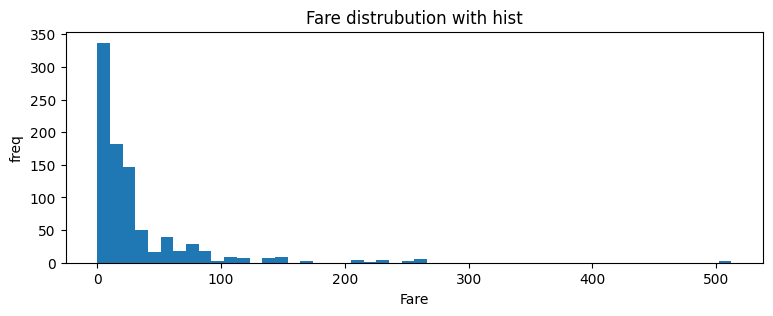

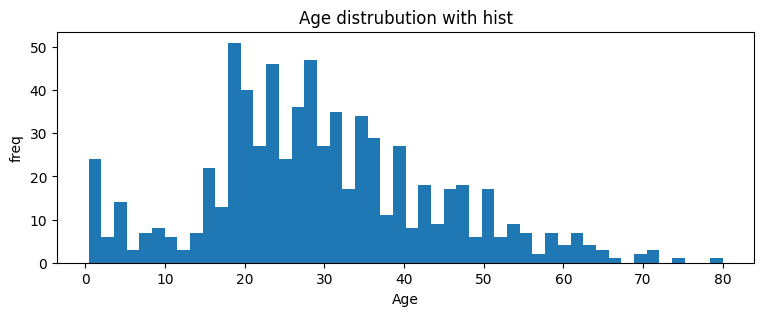

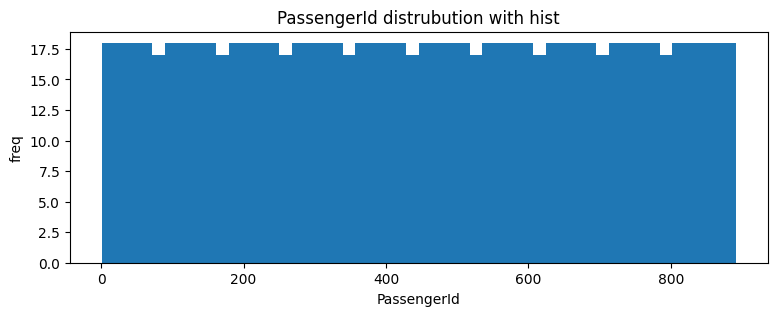

In [10]:
numericVar = ["Fare", "Age", "PassengerId"]
for n in numericVar:
    plot_hist(n)

# Basic data analysis

In [11]:
# p-class vs survived

train_df[["Pclass", "Survived"]].groupby(["Pclass"], as_index = False).mean().sort_values(by="Survived", ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
# sex vs survived
train_df[["Sex", "Survived"]].groupby(["Sex"], as_index=False).mean().sort_values(by="Survived", ascending=False)


,Sex,Survived
0,female,0.742038
1,male,0.188908


In [13]:
# Sibsp vs survived
train_df[["SibSp", "Survived"]].groupby(["SibSp"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [14]:
# Parch vs Survived
train_df[["Parch", "Survived"]].groupby("Parch", as_index=False).mean().sort_values(by="Survived", ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


# outlier detection

In [15]:
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []

    for c in features:
        Q1 = np.percentile(df[c],25)
        Q3 = np.percentile(df[c],75)
        IQR = Q3- Q1
        outlier_step = IQR*1.5
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( i for i, v in outlier_indices.items() if v>2)
    return multiple_outliers

In [16]:
train_df.loc[detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [17]:
train_df = train_df.drop(detect_outliers(train_df, ["Age", "SibSp", "Parch", "Fare"]),axis=0).reset_index(drop=True)

# missing values

In [18]:
train_df_len = len(train_df)

In [19]:
train_df.columns[train_df.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

In [20]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            170
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          680
Embarked         2
dtype: int64

In [21]:
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
60,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
821,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [22]:
train_df["Embarked"] = train_df["Embarked"].fillna("C")
train_df[train_df["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# visualization

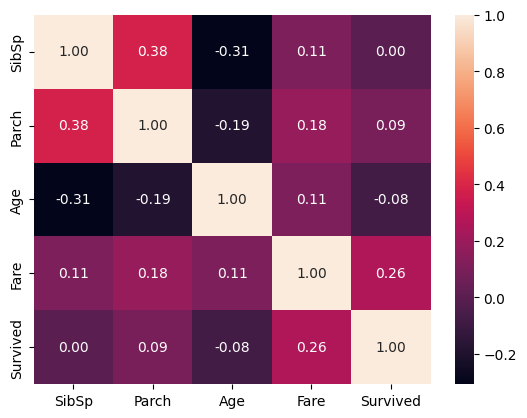

In [23]:
list1 = ["SibSp", "Parch", "Age", "Fare", "Survived"]
sns.heatmap(train_df[list1].corr(), annot=True, fmt=".2f")
plt.show()

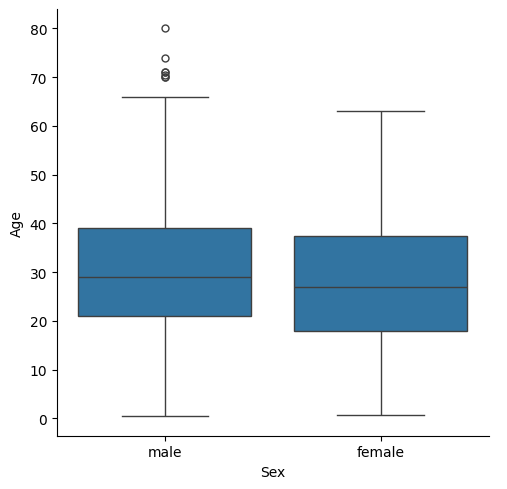

In [24]:
sns.catplot(x = "Sex", y = "Age", data = train_df, kind = "box")
plt.show()

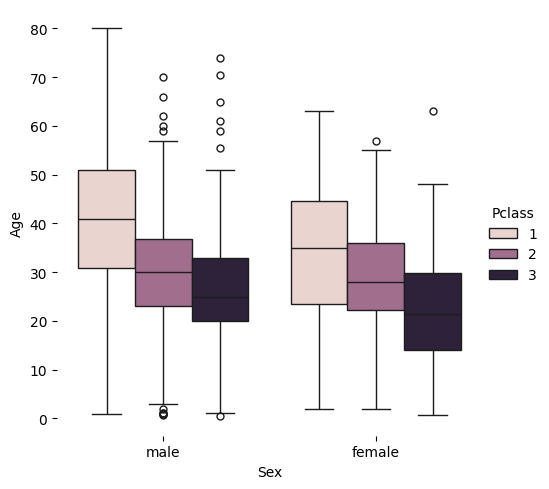

In [25]:
sns.catplot(x="Sex", y= "Age", hue="Pclass", data= train_df, kind="box" )
plt.box()

In [26]:
index_nan_Age = list(train_df["Age"][train_df["Age"].isnull()].index)
for i in index_nan_Age:
    age_pred = train_df["Age"][((train_df["SibSp"] == train_df.iloc[i]["SibSp"]) & (train_df["Parch"] == train_df.iloc[i]["Parch"]))]
    age_med = train_df["Age"].median()
    if not age_pred.empty:
        train_df.loc[i, "Age"] = age_pred.median()
    else:
        train_df.loc[i, "Age"] = age_med


In [27]:
train_df[train_df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [28]:
train_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [29]:
name = train_df["Name"]
train_df["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

In [30]:
train_df["Title"].head()

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

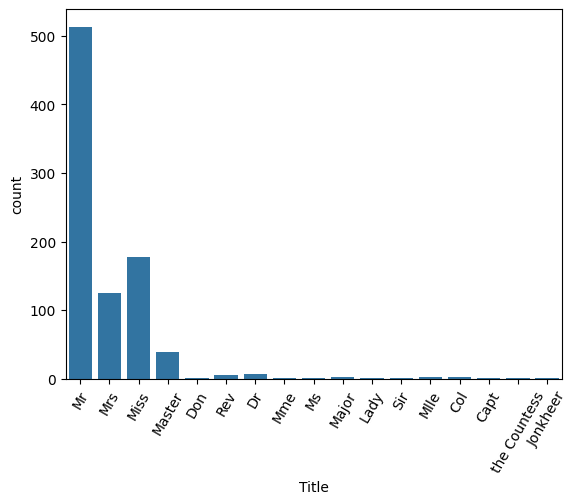

In [31]:
sns.countplot(x="Title", data =train_df)
plt.xticks(rotation = 60)
plt.show()

In [32]:
train_df["Title"] = train_df["Title"].replace(["Lady", "the Countess", "Capt", "Jonkheer", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Donaa"],"other")
train_df["Title"] = [0 if i == "Master" 
                     else 1 if i == "Miss" or i == "Ms" or i == "Mlle" or i == "Mrs" 
                     else 2 if i == "Mr" 
                     else 3 
                     for i in train_df["Title"]]
train_df["Title"].head(20)

0     2
1     1
2     1
3     1
4     2
5     2
6     2
7     0
8     1
9     1
10    1
11    1
12    2
13    2
14    1
15    1
16    0
17    2
18    1
19    1
Name: Title, dtype: int64

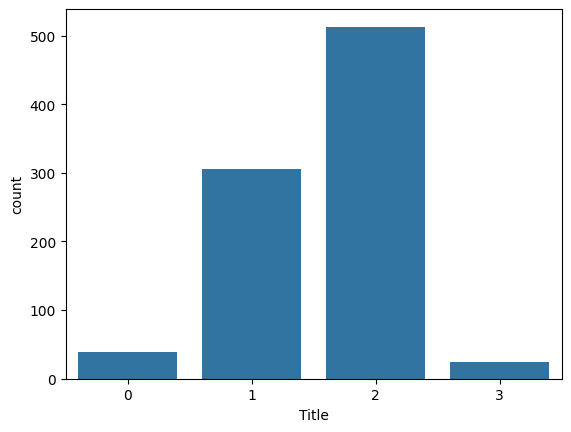

In [33]:
sns.countplot(x="Title", data=train_df)
plt.show()

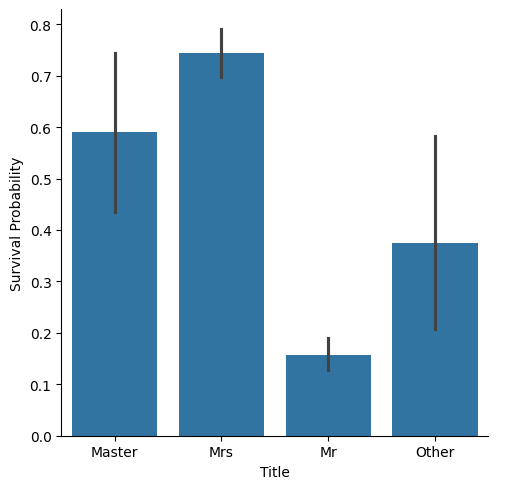

In [34]:
g = sns.catplot(x= "Title", y= "Survived", data=train_df, kind="bar")
g.set_xticklabels(["Master","Mrs","Mr","Other"])
g.set_ylabels("Survival Probability")
plt.show()

In [35]:
train_df.drop(labels=["Name"], axis=1, inplace=True)

In [36]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [37]:
train_df = pd.get_dummies(train_df, columns=["Title"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False


In [38]:
train_df["Fsize"] = train_df["SibSp"] + train_df["Parch"] + 1
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1


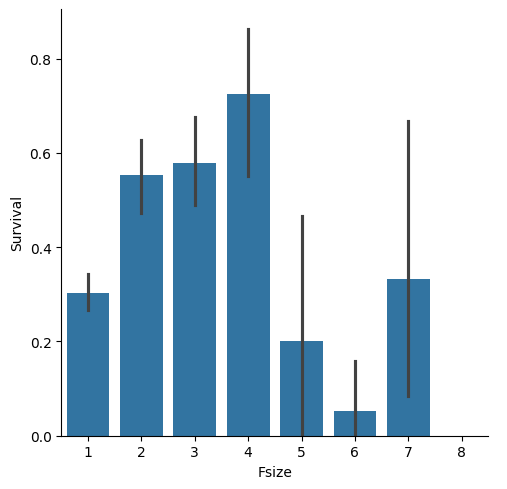

In [39]:
g = sns.catplot(x="Fsize", y="Survived", data=train_df, kind="bar")
g.set_ylabels("Survival")
plt.show()

In [40]:
train_df["family_size"] = [1 if i < 5
                           else 0
                           for i in train_df["Fsize"]]

train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,1
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,1


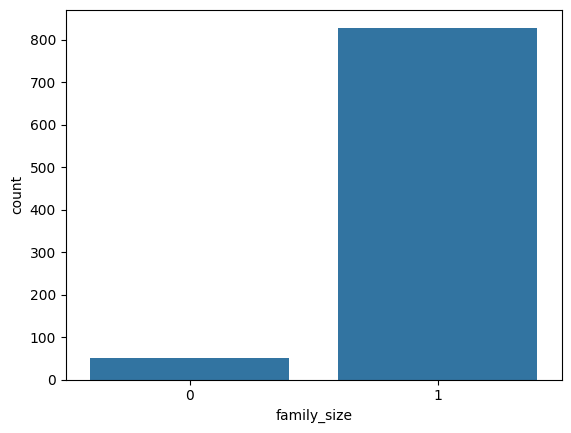

In [41]:
sns.countplot(x = "family_size", data=train_df)
plt.show()

In [42]:
train_df = pd.get_dummies(train_df, columns=["family_size"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,False,False,True,False,2,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,False,True,False,False,2,False,True
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False,True,False,False,1,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,False,True,False,False,2,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,False,False,True,False,1,False,True


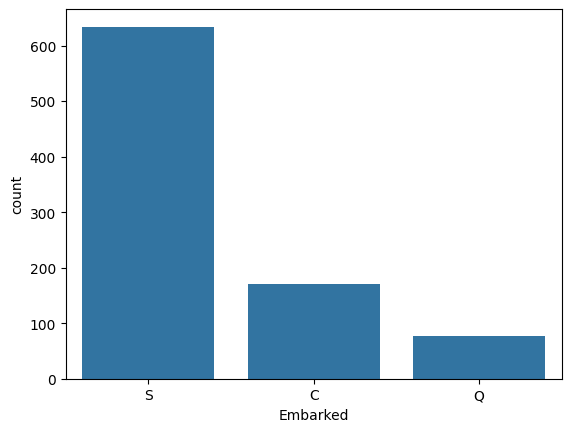

In [43]:
sns.countplot(x="Embarked", data=train_df)
plt.show()

In [44]:
train_df = pd.get_dummies(train_df, columns=["Embarked"])
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Title_0,Title_1,Title_2,Title_3,Fsize,family_size_0,family_size_1,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,False,False,True,False,2,False,True,False,False,True
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,False,True,False,False,2,False,True,True,False,False
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,1,False,True,False,False,True
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,False,True,False,False,2,False,True,False,False,True
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,False,False,True,False,1,False,True,False,False,True


In [45]:
train_df["Ticket"].head(20)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
Name: Ticket, dtype: object

In [46]:
tickets = []
for i in list(train_df.Ticket):
    if not i.isdigit():
        tickets.append(i.replace(".","").replace("/","").strip().split(" ")[0])
    else:
        tickets.append("x")
train_df["Ticket"] = tickets
train_df["Ticket"].head(20)

0         A5
1         PC
2     STONO2
3          x
4          x
5          x
6          x
7          x
8          x
9          x
10        PP
11         x
12        A5
13         x
14         x
15         x
16         x
17         x
18         x
19         x
Name: Ticket, dtype: object

In [47]:
train_df = pd.get_dummies(train_df, columns=["Ticket"], prefix="T")
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,...,T_SOPP,T_SOTONO2,T_SOTONOQ,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x
0,1,0,3,male,22.0,1,0,7.2500,NaN,False,...,False,False,False,False,False,False,False,False,False,False
1,2,1,1,female,38.0,1,0,71.2833,C85,False,...,False,False,False,False,False,False,False,False,False,False
2,3,1,3,female,26.0,0,0,7.9250,NaN,False,...,False,False,False,False,False,True,False,False,False,False
3,4,1,1,female,35.0,1,0,53.1000,C123,False,...,False,False,False,False,False,False,False,False,False,True
4,5,0,3,male,35.0,0,0,8.0500,NaN,False,...,False,False,False,False,False,False,False,False,False,True


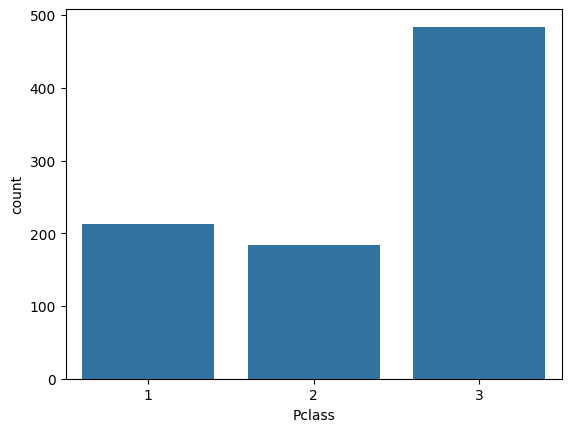

In [48]:
sns.countplot(x="Pclass", data=train_df)
plt.show()

In [49]:
train_df = pd.get_dummies(train_df, columns=["Pclass"])
train_df.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,...,T_SP,T_STONO,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3
0,1,0,male,22.0,1,0,7.2500,NaN,False,False,...,False,False,False,False,False,False,False,False,False,True
1,2,1,female,38.0,1,0,71.2833,C85,False,True,...,False,False,False,False,False,False,False,True,False,False
2,3,1,female,26.0,0,0,7.9250,NaN,False,True,...,False,False,True,False,False,False,False,False,False,True
3,4,1,female,35.0,1,0,53.1000,C123,False,True,...,False,False,False,False,False,False,True,True,False,False
4,5,0,male,35.0,0,0,8.0500,NaN,False,False,...,False,False,False,False,False,False,True,False,False,True


In [50]:
train_df= pd.get_dummies(train_df, columns=["Sex"])
train_df.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,Cabin,Title_0,Title_1,Title_2,...,T_STONO2,T_SWPP,T_WC,T_WEP,T_x,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,1,0,22.0,1,0,7.2500,NaN,False,False,True,...,False,False,False,False,False,False,False,True,False,True
1,2,1,38.0,1,0,71.2833,C85,False,True,False,...,False,False,False,False,False,True,False,False,True,False
2,3,1,26.0,0,0,7.9250,NaN,False,True,False,...,True,False,False,False,False,False,False,True,True,False
3,4,1,35.0,1,0,53.1000,C123,False,True,False,...,False,False,False,False,True,True,False,False,True,False
4,5,0,35.0,0,0,8.0500,NaN,False,False,True,...,False,False,False,False,True,False,False,True,False,True


In [51]:
train_df.drop(labels=["PassengerId", "Cabin", "Fsize"], axis=1, inplace=True)
train_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_0', 'Title_1',
       'Title_2', 'Title_3', 'family_size_0', 'family_size_1', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'T_A4', 'T_A5', 'T_AS', 'T_C', 'T_CA',
       'T_CASOTON', 'T_FC', 'T_FCC', 'T_Fa', 'T_LINE', 'T_PC', 'T_PP', 'T_PPP',
       'T_SC', 'T_SCA4', 'T_SCAH', 'T_SCOW', 'T_SCPARIS', 'T_SCParis', 'T_SOC',
       'T_SOP', 'T_SOPP', 'T_SOTONO2', 'T_SOTONOQ', 'T_SP', 'T_STONO',
       'T_STONO2', 'T_SWPP', 'T_WC', 'T_WEP', 'T_x', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Sex_female', 'Sex_male'],
      dtype='object')

In [52]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


In [53]:
train = train_df[:train_df_len]
X_train = train.drop(labels="Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)
print("X_train", len(X_train))
print("X_test",len(X_test))
print("y_train",len(y_train))
print("y_test",len(y_test))

X_train 590
X_test 291
y_train 590
y_test 291


In [54]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
acc_log_train = round(logreg.score(X_train, y_train)*100,2)
acc_log_test = round(logreg.score(X_test, y_test)*100,2)
print("training acc: % {}".format(acc_log_train))
print("testing acc: % {}".format(acc_log_test))

training acc: % 82.71
testing acc: % 81.1


In [55]:
random_state=42

classifier = [DecisionTreeClassifier(random_state=random_state),
              SVC(random_state=random_state),
              RandomForestClassifier(random_state=random_state),
              LogisticRegression(random_state=random_state),
              KNeighborsClassifier()]

dt_param_grid = {"min_samples_split": range(10,500,20),
                 "max_depth": range(1,20,2)}

svc_param_grid = {"kernel": ["rbf"],
                  "gamma": [0.001,0.01,0.1,1],
                  "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                 "min_samples_split": [2,3,10],
                 "min_samples_leaf": [1,3,10],
                 "bootstrap": [False],
                 "n_estimators": [100,300],
                 "criterion": ["gini"]}

log_reg_grid = {"C": np.logspace(-3,3,7),
                "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype=int).tolist(),
                  "weights": ["uniform", "distance"],
                  "metric": ["euclidean", "manhattan"]}

classifier_param = [dt_param_grid,
                    svc_param_grid,
                    rf_param_grid,
                    log_reg_grid,
                    knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []

for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits= 10), scoring="accuracy", n_jobs=-1, verbose=1 )
    clf.fit(X_train, y_train)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])
    

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.8355932203389831
Fitting 10 folds for each of 28 candidates, totalling 280 fits
0.7983050847457627
Fitting 10 folds for each of 54 candidates, totalling 540 fits
0.8440677966101695
Fitting 10 folds for each of 14 candidates, totalling 140 fits
0.8169491525423729
Fitting 10 folds for each of 40 candidates, totalling 400 fits
0.7779661016949151


In [57]:
cv_result = pd.DataFrame({"Cross validation acc means": cv_result, "ml models": ["DecisionTreeClassifier", "SVM", "RandomForestClassifier","LogisticRegression", "KNeighborsClassifier"]})
cv_result

,Cross validation acc means,ml models
0,0.835593,DecisionTreeClassifier
1,0.798305,SVM
2,0.844068,RandomForestClassifier
3,0.816949,LogisticRegression
4,0.777966,KNeighborsClassifier


<Axes: xlabel='ml models', ylabel='Cross validation acc means'>

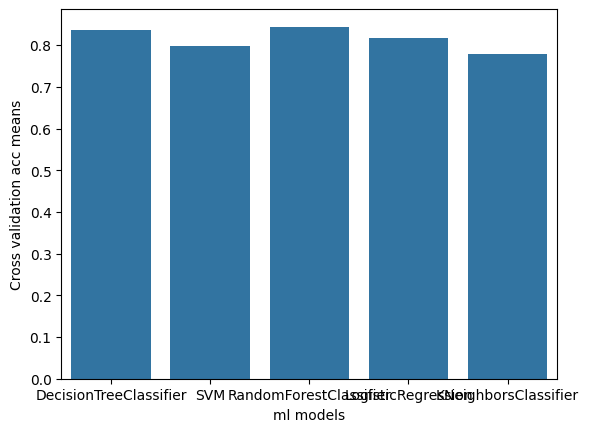

In [58]:
sns.barplot(cv_result, x="ml models", y="Cross validation acc means")

In [59]:
votingC = VotingClassifier(estimators= [("dt", best_estimators[0]),
                                        ("rfc", best_estimators[2]),
                                        ("lr", best_estimators[3])],
                            voting ="soft", n_jobs =-1)

votingC = votingC.fit(X_train, y_train)
print(accuracy_score(votingC.predict(X_test), y_test))

0.8178694158075601
